# Logistic Regression

# the data

我们将建立一个逻辑回归模型来预测一个学生是否被大学录取。假设你是一个大学系的管理员，你想根据两次考试的结果来决定每个申请人的录取机会。你有以前的申请人的历史数据，你可以用它作为逻辑回归的训练集。对于每一个培训例子，你有两个考试的申请人的分数和录取决定。为了做到这一点，我们将建立一个分类模型，根据考试成绩估计入学概率

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
import os
path = 'data'+os.sep+'LogiReg_data.txt'
pdData = pd.read_csv(path, header = None, names = ['Exam 1', 'Exam 2', 'Admitted'])
pdData.head(10)
print(type(pdData))

<class 'pandas.core.frame.DataFrame'>


In [12]:
pdData.shape

(100, 3)

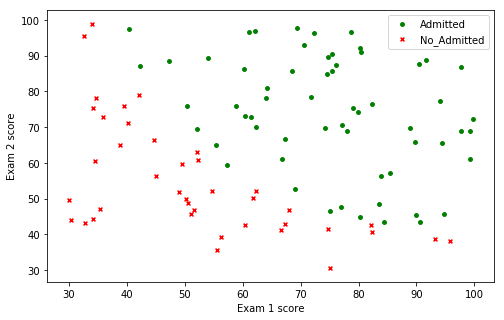

In [23]:
positive = pdData[pdData['Admitted'] == 1]
negative = pdData[pdData['Admitted'] == 0]
fig,ax = plt.subplots(figsize = (8,5))
ax.scatter(positive['Exam 1'],positive['Exam 2'],s = 15,c = 'g',marker = 'o',label = 'Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s = 15,c = 'r',marker = 'x',label = 'No_Admitted')
ax.legend()
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')

## The Logistic Regresion

目标：建立分类器（求解出三个参数 $\theta_0         \theta_1         \theta_2 $）


设定阈值，根据阈值判断录取结果

### 要完成的模块
-  `sigmoid` : 映射到概率的函数

-  `model` : 返回预测结果值

-  `cost` : 根据参数计算损失

-  `gradient` : 计算每个参数的梯度方向

-  `descent` : 进行参数更新

-  `accuracy`: 计算精度

###  `sigmoid` 函数

$$
g(z) = \frac{1}{1+e^{-z}}   
$$

In [24]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

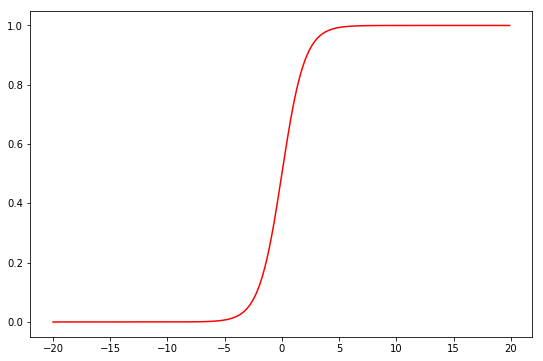

In [31]:
nums = np.arange(-20, 20, step = 0.1)
fig, ax = plt.subplots(figsize = (9,6))
ax.plot(nums,sigmoid(nums), 'r')

In [47]:
def model(X, theta):
    return sigmoid(np.dot(X, theta.T))

### 转换数据，DataFrame -->  array 

In [38]:
pdData.insert(0,'ones',1)
print(pdData.head(10))
arr_data = pdData.as_matrix()
clos = arr_data.shape[1]
X = arr_data[:,0:clos-1]
Y = arr_data[:,clos-1:clos]
theta = np.zeros([1,3])

   ones     Exam 1     Exam 2  Admitted
0     1  34.623660  78.024693         0
1     1  30.286711  43.894998         0
2     1  35.847409  72.902198         0
3     1  60.182599  86.308552         1
4     1  79.032736  75.344376         1
5     1  45.083277  56.316372         0
6     1  61.106665  96.511426         1
7     1  75.024746  46.554014         1
8     1  76.098787  87.420570         1
9     1  84.432820  43.533393         1


In [41]:
# 查看数据
X[:5]

array([[  1.        ,  34.62365962,  78.02469282],
       [  1.        ,  30.28671077,  43.89499752],
       [  1.        ,  35.84740877,  72.90219803],
       [  1.        ,  60.18259939,  86.3085521 ],
       [  1.        ,  79.03273605,  75.34437644]])

In [40]:
Y[:5]

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.]])

In [42]:
theta[:5]

array([[ 0.,  0.,  0.]])

In [43]:
X.shape,Y.shape,theta.shape

((100, 3), (100, 1), (1, 3))

### 损失函数
将对数似然函数去负号

$$
D(h_\theta(x), y) = -y\log(h_\theta(x)) - (1-y)\log(1-h_\theta(x))
$$
求平均损失
$$
J(\theta)=\frac{1}{n}\sum_{i=1}^{n} D(h_\theta(x_i), y_i)
$$

In [48]:
def cost(X, Y, theta):
    left = np.multiply(-Y, np.log(model(X, theta)))
    right = np.multiply(1-Y, np.log(1-model(X,theta)))
    return np.sum(left-right) / (len(X))

In [49]:
cost(X,Y,theta)

0.69314718055994529

### 计算梯度


$$
\frac{\partial J}{\partial \theta_j}=-\frac{1}{m}\sum_{i=1}^n (y_i - h_\theta (x_i))x_{ij}
$$


In [119]:
def gradient(X, Y,theta):
    grad = np.zeros(theta.shape)
    error = (model(X,theta)-Y).ravel()
    for j in range(len(theta.ravel())):
        term = np.multiply(error, X[:,j])
        grad[0,j] = np.sum(term)/(len(X))
    return grad

In [121]:
old_theta = gradient(X, Y, theta)
print(old_theta)

[[ -0.1        -12.00921659 -11.26284221]]


In [138]:
#梯度上升算法，每次参数迭代时都需要遍历整个数据集
def graAscent(dataMatrix,matLabel):
    m,n=dataMatrix.shape
    matMatrix=np.mat(dataMatrix)

    w=np.ones((n,1))
    alpha=0.00001
    num=10000
    for i in range(num):
        error=sigmoid(matMatrix*w)-matLabel
        w=w-alpha*matMatrix.transpose()*error
#         print(w)
    return w

In [142]:
end_theta = graAscent(X,Y).ravel()
print(end_theta)

[[ 0.23487118  0.00879945 -0.00137174]]


In [224]:
#改进后的随机梯度上升算法
#从两个方面对随机梯度上升算法进行了改进,正确率确实提高了很多
#改进一：对于学习率alpha采用非线性下降的方式使得每次都不一样
#改进二：每次使用一个数据，但是每次随机的选取数据，选过的不在进行选择
def stocGraAscent1(dataMatrix,matLabel):
    m,n=dataMatrix.shape
    matMatrix=np.mat(dataMatrix)

    w=np.ones((n,1))
    num=1000 #这里的这个迭代次数对于分类效果影响很大，很小时分类效果很差
    setIndex=set([])
    for i in range(num):
        for j in range(m):
            alpha=4/(1+i+j)+0.2

            dataIndex=np.random.randint(0,100)
            while dataIndex in setIndex:
                setIndex.add(dataIndex)
                dataIndex=np.random.randint(0,100)
            error=sigmoid(matMatrix[dataIndex]*w)-matLabel[dataIndex]
            w=w-alpha*matMatrix[dataIndex].transpose()*error    
    return w

In [225]:
new_theta = stocGraAscent1(X,Y).ravel()
print(new_theta)

D:\Anacanda\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


[[-1304.99698924    18.06698815     5.29622874]]


In [216]:
#设定阈值
def predict(X, end_theta):
    return [1 if x >= 0.5 else 0 for x in model(X, end_theta)]

In [227]:
scaled_data = arr_data.copy()
scaled_X = scaled_data[:, :3]
y = scaled_data[:, 3]

predictions = predict(scaled_X, new_theta)
print(predictions)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
accuracy = 86%
